In [1]:
# helper functions

import numpy as np
import itertools
import os

# the purpose of this function is to take a TSP formatted file as specicfied by the
#   assignment and return a list of all the cities and their coordanites in an array
#   called arr.  
#  arr[i] will be the ith city.  
#  arr[i][0] will be the name of the ith city (ex. arr[0][0] == 'A')
#  arr[i][1] will be the x coord of the ith city
#  arr[i][2] will be the x coord of the ith city
def getVerteciesTSP(filepath):
    Arr = []
    first = True
    lines = open(filepath, "r")
    n = int(lines.readline())
    arr = [[]]*n
    for i in range(n) :
        line = lines.readline()
        words = line.split()
        j = 0
        city = ['label', 0, 0]
        for word in words:
            if(j == 0) :
                city[j] = word
            else :
                city[j]= int(word)
            j+=1
        arr[i] = city
    return arr

# return the euclidean distance of two points
def dist(a, b):
    return ((int(b[1]) - int(a[1])) ** 2 + (int(b[2]) - int(a[2])) ** 2)**0.5

# retruns a random tour of the cities
def random_state(X):
    return np.random.permutation(X)

# calculate the cost of a node
def cost(node, start):
    l = len(node)
    if(l < 2):
        return 0
    cost = 0
    for i in range(1,l):
        cost += dist(node[i], node[i-1])
    cost += dist(node[0], start)
    cost += dist(node[-1], start)
    return cost

#swap any two cities in the tour
def nbor_relation(node):
    nbors = []
    n = len(node)
    for i in range(n):
        for j in range(n):
            if(i > j):
                nbor =  []
                for k in range(n):
                    nbor.append(node[k])
                nbor[i] = node[j]
                nbor[j] = node[i]
                nbors.append(nbor)
    return nbors
            
    return list(itertools.permutations(node))

def get_best_nbor(node, start):
    nbors = nbor_relation(node)
    costs = []
    l = len(nbors)
    for i in range(l):
        costs.append(cost(nbors[i], start))
    min_cost = min(costs)
    best_nbor = nbors[costs.index(min_cost)]
    return best_nbor

In [2]:
def hill_climbing(filepath):
    X = getVerteciesTSP(filepath)
    start = X.pop(0)
    curr_node = random_state(X)
    steps = 0
    while(1):
        next_node = get_best_nbor(curr_node, start)
        curr_cost = cost(curr_node, start)
        next_cost = cost(next_node, start)
        if(curr_cost <= next_cost):
            break
        curr_node = next_node
        steps += 1
    return steps, curr_node, cost(curr_node, start), start

In [3]:
# a list of optimal costs for the TSPs of 14 - 16 cities
solns = [
    [316.6776082168322, 324.3082534116089, 336.9950237596884, 319.5282469523324, 351.21973296778407, 311.10714281518773, 271.633085065336, 358.9141567661652, 273.09371769707457, 322.3268671711924],
    [315.07667336786403, 316.13786124656355, 280.7601519106411, 326.2448541098341, 377.9288829793903, 291.89668094654513, 350.009518949241, 343.3993664176368, 355.1054844547043, 326.7292591337147],
    [404.4585854022553, 354.55691319058866, 360.2028589771428, 347.43634498288617, 357.17781423241576, 346.5199572862724, 373.2996812562038, 356.7254938089962, 243.97572241252576, 330.5054664199449],
        ]

In [4]:
# this function runs hillclimbing on all of the files, of size 14 to 16
def investigate_hill_climbing(path) :
    first = os.listdir(path)
    index = 0
    city_sizes = []
    for tsp_size in first:
        if(tsp_size == str(index+14)):
            ## if tsp_size is 14 15 16
            newPath = path + "/" + tsp_size
            second = os.listdir(newPath)
            l = len(newPath) + 1
            steps = []
            soln_quality = []
            soln_accuracy = []
            for instance in second :
                j = int(instance[-5])-1
                if(j == -1):
                    j = 9
                finalPath = newPath + "/" + instance
                if(finalPath[l] != '.' ) :
                    s = finalPath[13:15]
                    if(s[1] == '/') :
                        s = s[0]
                    best_soln = solns[index][j]
                    num_steps = []
                    soln_quality = []
                    num_right = 0
                    for i in range(100):
                        a = hill_climbing(finalPath)
                        num_steps.append(a[0])
                        soln_quality.append(a[2]/best_soln)
                        if(best_soln == a[2]):
                            num_right += 1.0
                    print(finalPath + ":")
                    q = np.mean(num_steps)
                    m = np.mean(soln_quality)
                    n = num_right
                    print("    Average number of steps : " + str(q))
                    print("    Average quality of best solution: " + str(m))
                    print("    Percentage where it was optimal: " + str(n))
                    print("")
                    steps.append(q)
                    soln_quality.append(m)
                    soln_accuracy.append(n)
            print("For the TSP problems of size " + str(index +14)+":")
            print("    Average number of steps : " + str(np.mean(steps)))
            print("    Average quality of best solution: " + str(np.mean(soln_quality)))
            print("    Percentage where it was optimal: " + str(np.mean(soln_accuracy)))
            print("")
            index+=1

In [5]:
investigate_hill_climbing("tsp_problems")

tsp_problems/14/instance_1.txt:
    Average number of steps : 8.26
    Average quality of best solution: 1.2132603371929838
    Percentage where it was optimal: 0

tsp_problems/14/instance_10.txt:
    Average number of steps : 7.87
    Average quality of best solution: 1.162581433633889
    Percentage where it was optimal: 0

tsp_problems/14/instance_2.txt:
    Average number of steps : 8.48
    Average quality of best solution: 1.2881380764537602
    Percentage where it was optimal: 0

tsp_problems/14/instance_3.txt:
    Average number of steps : 8.06
    Average quality of best solution: 1.2278535884596806
    Percentage where it was optimal: 19.0

tsp_problems/14/instance_4.txt:
    Average number of steps : 7.65
    Average quality of best solution: 1.1144664602530794
    Percentage where it was optimal: 1.0

tsp_problems/14/instance_5.txt:
    Average number of steps : 7.51
    Average quality of best solution: 1.1856926182191863
    Percentage where it was optimal: 0

tsp_problem

In [6]:
A = hill_climbing('tsp_problems/5/instance_1.txt')
local_min = A[1]
print("consider the tour " + str(local_min))
print("it is known that this is a local optimum since the best neighbor is :")
best_nbor = get_best_nbor(A[1],A[3])
print("    "+ str(best_nbor))
print("which has a cost of: " + str(cost(best_nbor, A[3])))
print("which is greater than the cost of the current node: " + str(cost(local_min, A[3])))
print("")
print("Therfore: " + str(A[1]) + " is a local minimum")

consider the tour [array(['D', '48', '80'], dtype='<U2'), array(['E', '81', '62'], dtype='<U2'), array(['C', '71', '25'], dtype='<U2'), array(['B', '25', '73'], dtype='<U2')]
it is known that this is a local optimum since the best neighbor is :
    [array(['D', '48', '80'], dtype='<U2'), array(['C', '71', '25'], dtype='<U2'), array(['E', '81', '62'], dtype='<U2'), array(['B', '25', '73'], dtype='<U2')]
which has a cost of: 196.9445936278752
which is greater than the cost of the current node: 184.33199990400223

Therfore: [array(['D', '48', '80'], dtype='<U2'), array(['E', '81', '62'], dtype='<U2'), array(['C', '71', '25'], dtype='<U2'), array(['B', '25', '73'], dtype='<U2')] is a local minimum


In [7]:
# unlikley to help us.  plateaus wont happen becuase to reach a plateau, this implies
#   that when we swap 2 cities in the tour, then the cost is unlikley to be the same
def hill_climbing_with_sideways_moves(filepath, side_ways_limit):
    side_ways_count = 0
    X = getVerteciesTSP(filepath)
    start = X.pop(0)
    curr_node = random_state(X)
    steps = 0
    while(1):
        next_node = get_best_nbor(curr_node, start)
        curr_cost = cost(curr_node, start)
        next_cost = cost(next_node, start)
        if(curr_cost < next_cost):
            break
        if(curr_cost == next_cost):
            if(side_ways_count <= side_ways_limit):
                curr_node = next_node
                side_ways_count += 1
            else:
                break
        side_ways_count = 0
        curr_node = next_node
        steps += 1
    return steps, curr_node, cost(curr_node, start)

In [8]:
# this function runs hillclimbing with sideways moves on all of the files, of size 14 to 16
def investigate_hill_climbing_with_sideways_moves(path) :
    first = os.listdir(path)
    index = 0
    city_sizes = []
    for tsp_size in first:
        if(tsp_size == str(index+14)):
            ## if tsp_size is 14 15 16
            newPath = path + "/" + tsp_size
            second = os.listdir(newPath)
            l = len(newPath) + 1
            steps = []
            soln_quality = []
            soln_accuracy = []
            for instance in second :
                j = int(instance[-5])-1
                if(j == -1):
                    j = 9
                finalPath = newPath + "/" + instance
                if(finalPath[l] != '.' ) :
                    s = finalPath[13:15]
                    if(s[1] == '/') :
                        s = s[0]
                    best_soln = solns[index][j]
                    num_steps = []
                    soln_quality = []
                    num_right = 0
                    for i in range(100):
                        a = hill_climbing_with_sideways_moves(finalPath,100)
                        num_steps.append(a[0])
                        soln_quality.append(a[2]/best_soln)
                        if(best_soln == a[2]):
                            num_right += 1.0
                    print(finalPath + ":")
                    q = np.mean(num_steps)
                    m = np.mean(soln_quality)
                    n = num_right
                    print("    Average number of steps : " + str(q))
                    print("    Average quality of best solution: " + str(m))
                    print("    Percentage where it was optimal: " + str(n))
                    print("")
                    steps.append(q)
                    soln_quality.append(m)
                    soln_accuracy.append(n)
            print("For the TSP problems of size " + str(index +14)+":")
            print("    Average number of steps : " + str(np.mean(steps)))
            print("    Average quality of best solution: " + str(np.mean(soln_quality)))
            print("    Percentage where it was optimal: " + str(np.mean(soln_accuracy)))
            print("")
            index+=1

In [9]:
investigate_hill_climbing_with_sideways_moves("tsp_problems")

tsp_problems/14/instance_1.txt:
    Average number of steps : 8.51
    Average quality of best solution: 1.1604841808105646
    Percentage where it was optimal: 0

tsp_problems/14/instance_10.txt:
    Average number of steps : 7.74
    Average quality of best solution: 1.164574612027606
    Percentage where it was optimal: 0

tsp_problems/14/instance_2.txt:
    Average number of steps : 8.86
    Average quality of best solution: 1.2772444732313988
    Percentage where it was optimal: 0

tsp_problems/14/instance_3.txt:
    Average number of steps : 8.12
    Average quality of best solution: 1.1953269817838303
    Percentage where it was optimal: 16.0

tsp_problems/14/instance_4.txt:
    Average number of steps : 7.62
    Average quality of best solution: 1.1236596179069043
    Percentage where it was optimal: 1.0

tsp_problems/14/instance_5.txt:
    Average number of steps : 7.54
    Average quality of best solution: 1.1762976378278942
    Percentage where it was optimal: 0

tsp_problem

In [40]:

def hill_climbing_with_random_restarts(filepath, restarts_limit):
    num_restarts = 0
    nodes = []
    X = getVerteciesTSP(filepath)
    start = X.pop(0)
    curr_node = random_state(X)
    steps = 0
    while(1):
        next_node = get_best_nbor(curr_node, start)
        curr_cost = cost(curr_node, start)
        next_cost = cost(next_node, start)
        if(curr_cost <= next_cost):
            if(num_restarts == restarts_limit):
                # get best solution
                l = len(nodes)
                if(l == 0):
                    return steps, curr_node, cost(curr_node, start)
                costs = []
                for i in range(l):
                    costs.append(cost(nodes[i], start))
                min_cost = min(costs)
                curr_node = nodes[costs.index(min_cost)]
                break
            else:
                num_restarts += 1
                nodes.append(curr_node)
                next_node = random_state(X) 
        curr_node = next_node
        steps += 1
    return steps, curr_node, cost(curr_node, start)

In [41]:
hill_climbing_with_random_restarts("tsp_problems/5/instance_1.txt", 3)

(9,
 [array(['B', '25', '73'], dtype='<U2'),
  array(['C', '71', '25'], dtype='<U2'),
  array(['E', '81', '62'], dtype='<U2'),
  array(['D', '48', '80'], dtype='<U2')],
 184.33199990400223)

In [46]:
import matplotlib.pyplot as plt

def investigate_hill_climbing_with_random_restartes(path) :
    plots = []
    first = os.listdir(path)
    index = 0
    city_sizes = []
    for tsp_size in first:
        if(tsp_size == str(index+14)):
            ## if tsp_size is 14 15 16
            newPath = path + "/" + tsp_size
            second = os.listdir(newPath)
            l = len(newPath) + 1
            steps = []
            soln_quality = []
            soln_accuracy = []
            for instance in second :
                j = int(instance[-5])-1
                if(j == -1):
                    j = 9
                finalPath = newPath + "/" + instance
                if(finalPath[l] != '.' ) :
                    s = finalPath[13:15]
                    if(s[1] == '/') :
                        s = s[0]
                    if(j < 2):
                        restarts = 0
                        data = []
                        while(True):
                            best_soln = solns[index][j]
                            num_steps = []
                            soln_quality = []
                            num_right = 0
                            for i in range(100):
                                a = hill_climbing_with_random_restarts(finalPath,restarts)
                                num_steps.append(a[0])
                                soln_quality.append(a[2]/best_soln)
                                if(best_soln == a[2]):
                                    num_right += 1.0
                            print(finalPath + ":")
                            q = np.mean(num_steps)
                            m = np.mean(soln_quality)
                            n = num_right
                            print("    for "+ str(restarts) +" random restarts used")
                            print("    Average number of steps : " + str(q))
                            print("    Average quality of best solution: " + str(m))
                            print("    Percentage where it was optimal: " + str(n))
                            steps.append(q)
                            soln_quality.append(m)
                            soln_accuracy.append(n)
                            data.append(m)
                            if(m <= 1.01):
                                print("    WOHOO")
                                print("")
                                break
                            else:
                                print("    aww")
                                print("")
                                restarts += 1
                        plots.append([data])
                        plt.plot(data)
                        plt.ylabel("Solution Quality")
                        plt.xlabel("# of rstarts allowed")
                        plt.show()
            print("For the TSP problems of size " + str(index +14)+":")
            print("    Average number of steps : " + str(np.mean(steps)))
            print("    Average quality of best solution: " + str(np.mean(soln_quality)))
            print("    Percentage where it was optimal: " + str(np.mean(soln_accuracy)))
            print("")
            index+=1
    return plots

tsp_problems/14/instance_1.txt:
    for 0 random restarts used
    Average number of steps : 8.19
    Average quality of best solution: 1.2047802007403696
    Percentage where it was optimal: 0
    aww

tsp_problems/14/instance_1.txt:
    for 1 random restarts used
    Average number of steps : 17.49
    Average quality of best solution: 1.2086499297385889
    Percentage where it was optimal: 0
    aww

tsp_problems/14/instance_1.txt:
    for 2 random restarts used
    Average number of steps : 27.37
    Average quality of best solution: 1.1161950579059077
    Percentage where it was optimal: 0
    aww

tsp_problems/14/instance_1.txt:
    for 3 random restarts used
    Average number of steps : 35.82
    Average quality of best solution: 1.0828504138248483
    Percentage where it was optimal: 0
    aww

tsp_problems/14/instance_1.txt:
    for 4 random restarts used
    Average number of steps : 45.25
    Average quality of best solution: 1.0629039650797503
    Percentage where it was o

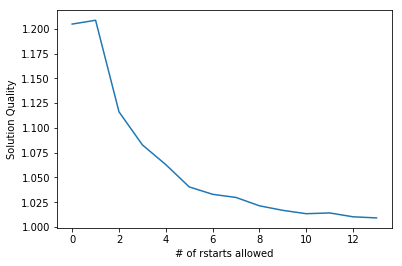

tsp_problems/14/instance_2.txt:
    for 0 random restarts used
    Average number of steps : 8.84
    Average quality of best solution: 1.2516509427526323
    Percentage where it was optimal: 0
    aww

tsp_problems/14/instance_2.txt:
    for 1 random restarts used
    Average number of steps : 18.49
    Average quality of best solution: 1.2576800037995708
    Percentage where it was optimal: 0
    aww

tsp_problems/14/instance_2.txt:
    for 2 random restarts used
    Average number of steps : 27.95
    Average quality of best solution: 1.195519792560968
    Percentage where it was optimal: 0
    aww

tsp_problems/14/instance_2.txt:
    for 3 random restarts used
    Average number of steps : 38.29
    Average quality of best solution: 1.1379176747749475
    Percentage where it was optimal: 0
    aww

tsp_problems/14/instance_2.txt:
    for 4 random restarts used
    Average number of steps : 47.53
    Average quality of best solution: 1.077950040096674
    Percentage where it was opt

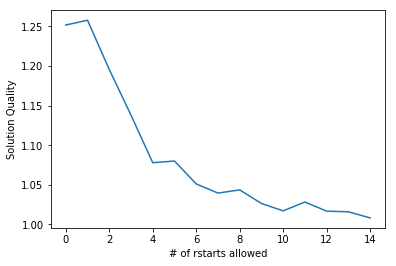

For the TSP problems of size 14:
    Average number of steps : 72.56517241379309
    Average quality of best solution: 1.0083021293966783
    Percentage where it was optimal: 0.0

tsp_problems/15/instance_1.txt:
    for 0 random restarts used
    Average number of steps : 8.44
    Average quality of best solution: 1.1201526275989735
    Percentage where it was optimal: 1.0
    aww

tsp_problems/15/instance_1.txt:
    for 1 random restarts used
    Average number of steps : 17.69
    Average quality of best solution: 1.1167243351064635
    Percentage where it was optimal: 0
    aww

tsp_problems/15/instance_1.txt:
    for 2 random restarts used
    Average number of steps : 26.65
    Average quality of best solution: 1.0847533540423255
    Percentage where it was optimal: 2.0
    aww

tsp_problems/15/instance_1.txt:
    for 3 random restarts used
    Average number of steps : 35.61
    Average quality of best solution: 1.062913094160037
    Percentage where it was optimal: 1.0
    aww



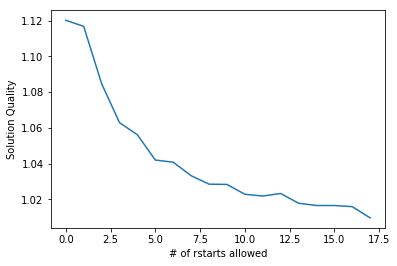

tsp_problems/15/instance_2.txt:
    for 0 random restarts used
    Average number of steps : 9.06
    Average quality of best solution: 1.1436944386175216
    Percentage where it was optimal: 5.0
    aww

tsp_problems/15/instance_2.txt:
    for 1 random restarts used
    Average number of steps : 19.76
    Average quality of best solution: 1.1379886155837975
    Percentage where it was optimal: 8.0
    aww

tsp_problems/15/instance_2.txt:
    for 2 random restarts used
    Average number of steps : 30.23
    Average quality of best solution: 1.102211378778737
    Percentage where it was optimal: 5.0
    aww

tsp_problems/15/instance_2.txt:
    for 3 random restarts used
    Average number of steps : 40.1
    Average quality of best solution: 1.0674929139199996
    Percentage where it was optimal: 18.0
    aww

tsp_problems/15/instance_2.txt:
    for 4 random restarts used
    Average number of steps : 51.14
    Average quality of best solution: 1.0651192683342667
    Percentage where i

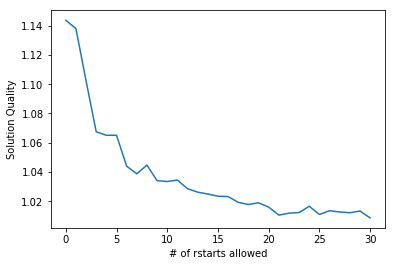

For the TSP problems of size 15:
    Average number of steps : 136.51020408163265
    Average quality of best solution: 1.0086581927200418
    Percentage where it was optimal: 31.224489795918366

tsp_problems/16/instance_1.txt:
    for 0 random restarts used
    Average number of steps : 9.39
    Average quality of best solution: 1.1125714889447444
    Percentage where it was optimal: 0
    aww

tsp_problems/16/instance_1.txt:
    for 1 random restarts used
    Average number of steps : 18.53
    Average quality of best solution: 1.1327848932463112
    Percentage where it was optimal: 0
    aww

tsp_problems/16/instance_1.txt:
    for 2 random restarts used
    Average number of steps : 28.84
    Average quality of best solution: 1.074090539660122
    Percentage where it was optimal: 1.0
    aww

tsp_problems/16/instance_1.txt:
    for 3 random restarts used
    Average number of steps : 39.23
    Average quality of best solution: 1.0650268905483158
    Percentage where it was optimal:

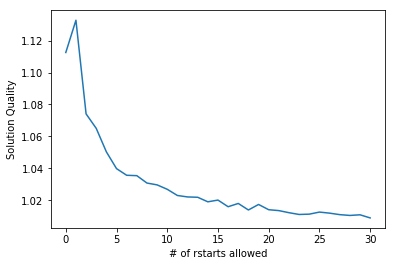

tsp_problems/16/instance_2.txt:
    for 0 random restarts used
    Average number of steps : 9.53
    Average quality of best solution: 1.2726038785261347
    Percentage where it was optimal: 0
    aww

tsp_problems/16/instance_2.txt:
    for 1 random restarts used
    Average number of steps : 20.16
    Average quality of best solution: 1.2837698480640398
    Percentage where it was optimal: 0
    aww

tsp_problems/16/instance_2.txt:
    for 2 random restarts used
    Average number of steps : 31.09
    Average quality of best solution: 1.1810223777539186
    Percentage where it was optimal: 0
    aww

tsp_problems/16/instance_2.txt:
    for 3 random restarts used
    Average number of steps : 42.76
    Average quality of best solution: 1.1501921395786519
    Percentage where it was optimal: 0
    aww

tsp_problems/16/instance_2.txt:
    for 4 random restarts used
    Average number of steps : 52.91
    Average quality of best solution: 1.1212686497162803
    Percentage where it was o

In [ ]:
#  this function will produce all of the plots for the question.  but it takes a long time.
#   i was origionally planning on saving the plots, but I lost connection and lost the data :(
#   now that im re runniong the code, i realise the assignment is due in 25 min, and i have no time to re run
#   please help :(


plots = investigate_hill_climbing_with_random_restartes('tsp_problems')

In [ ]:
# Q6

import math
import random

def simulated_annealing(filepath, T_init, T_decrease):
    T = T_init
    X = getVerteciesTSP(filepath)
    start = X.pop(0)
    curr_node = random_state(X)
    steps = 0
    while(T > 0):
        next_node = random_state(X)
        curr_cost = cost(curr_node, start)
        next_cost = cost(next_node, start)
        E = curr_cost - next_cost
        if(E > 0):
            curr_node = next_node
        else:
            p = math.exp(E/T)*100
            r = random.randint(1,101)
            if(r <= p):
                curr_node = next_node
        T -= T_decrease
        steps += 1
    return steps, curr_node, cost(curr_node, start)

In [ ]:
import matplotlib.pyplot as plt

def investigate_simulates_annealing_1(path) :
    plots1 = []
    plots2 = []
    first = os.listdir(path)
    index = 0
    city_sizes = []
    for tsp_size in first:
        if(tsp_size == str(index+14)):
            ## if tsp_size is 14 15 16
            newPath = path + "/" + tsp_size
            second = os.listdir(newPath)
            l = len(newPath) + 1
            steps = []
            soln_quality = []
            soln_accuracy = []
            for instance in second :
                j = int(instance[-5])-1
                if(j == -1):
                    j = 9
                finalPath = newPath + "/" + instance
                if(finalPath[l] != '.' ) :
                    s = finalPath[13:15]
                    if(s[1] == '/') :
                        s = s[0]
                    if(j < 2):
                        data1 = []
                        data2 = []
                        while(True):
                            best_soln = solns[index][j]
                            num_steps = []
                            soln_quality = []
                            num_right = 0
                            for i in range(100):
                                a = simulated_annealing(finalPath,100,10)
                                num_steps.append(a[0])
                                soln_quality.append(a[2]/best_soln)
                                if(best_soln == a[2]):
                                    num_right += 1.0
                            print(finalPath + ":")
                            q = np.mean(num_steps)
                            m = np.mean(soln_quality)
                            n = num_right
                            print("    for "+ str(restarts) +" random restarts used")
                            print("    Average number of steps : " + str(q))
                            print("    Average quality of best solution: " + str(m))
                            print("    Percentage where it was optimal: " + str(n))
                            steps.append(q)
                            soln_quality.append(m)
                            soln_accuracy.append(n)
                            data1.append(m)
                            dat2.append(q)
                        plots1.append([data1])
                        plots2.append([data2])
                        plt.plot(data1)
                        plt.plot(data2)
                        plt.ylabel("Solution Quality")
                        plt.xlabel("# of rstarts allowed")
                        plt.show()
            print("For the TSP problems of size " + str(index +14)+":")
            print("    Average number of steps : " + str(np.mean(steps)))
            print("    Average quality of best solution: " + str(np.mean(soln_quality)))
            print("    Percentage where it was optimal: " + str(np.mean(soln_accuracy)))
            print("")
            index+=1
    return plots1, plots2

In [ ]:
investigate_simulates_annealing_1(tsp_problems("tsp_problems"))